In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error
%matplotlib inline

## Polynomial Features

What if we have a complex (non-linear data), can we fit to it using a simple linear model ? we can fit to like this problem using the polynomial features to generate new features at the second degree of each feature or even more degrees as you need then run the linear regression model to fit.

# Functions to help

In [4]:
def init_2d_graphs(*colors):
    plt.style.use(colors) # color of your 2d graph
    plt.figure(figsize=(10,6)) # set the figure size
    return True

In [5]:
init_2d_graphs('ggplot' )

True

<Figure size 720x432 with 0 Axes>

In [17]:
def display(x, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(x,y, c='r', s=100, marker='.')
    plt.xlabel("x")
    plt.ylabel("y")
    

# Generate Non-linear Data

In [25]:
np.random.seed(1)
m = 100
x = 6 * np.random.rand(m ,1) - 3
y = .5 * x**2 + x + 2 + np.random.rand(m, 1)

In [26]:
print(x[: 10])
print("="*50)
print(y[: 10])

[[-0.49786797]
 [ 1.32194696]
 [-2.99931375]
 [-1.18600456]
 [-2.11946466]
 [-2.44596843]
 [-1.88243873]
 [-0.92663564]
 [-0.61939515]
 [ 0.2329004 ]]
[[1.95271319]
 [4.72277695]
 [4.38456984]
 [1.87456861]
 [3.03513571]
 [3.16877247]
 [1.9051703 ]
 [2.4321284 ]
 [2.26332694]
 [3.25734455]]


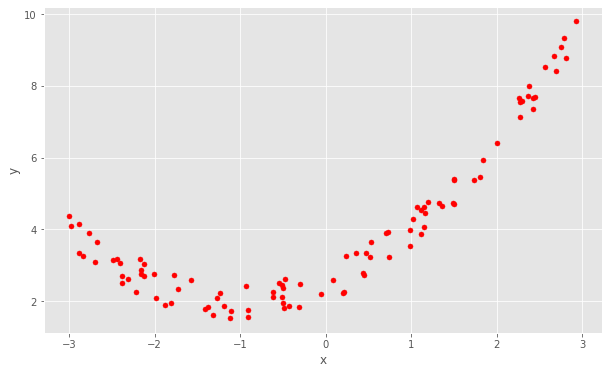

In [27]:
display(x,y)

# Note !

As we can see we can not fit a straight line to like this data.

In [40]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y.reshape(-1,1))

LinearRegression()

In [41]:
lin_reg.intercept_, lin_reg.coef_

(array([2.50010464]), array([[0.99483988, 0.49497892]]))

# Mapping

Can you imagine how we close to the orginal **y** equation, replace 

- .5 * x ** 2  with .49 * x ** 2  and 1 * x by .99 * x then add 2.5 instead of 2 + random numbers intilized

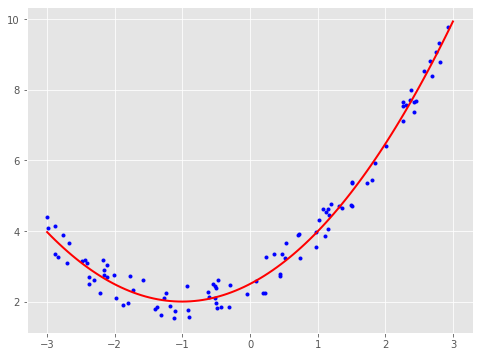

In [70]:
plt.figure(figsize=(8, 6))
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(x, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictit")

# Note !

As we can see we use the same linear regression model for linear data to fit non-linear data using the same linear regression model, but what we do is generate new features to help the model learn complex features by the relationship between the features and the poly features, because the relationship here is actually the number and its square will help the model to configure the result of the output as it poly equation.

But actually, we do not know the function that the data are genrated by or collected, so how we can check if the model fit the data very well or underfitting the data ?

As we know we need a validation set to decide the result of our model is good or overfitting or underfitting.

- The model that doing well on training but poorly on validation set looks to overfitting problem
- The model that doing poorly on training is actually underfitting before you validate 
- The model performs well on both looks to be the desired model.

Another way is to plot the learning curve of our model

# Learning Reate

Plot the models across learning on training and on validation.

In [96]:
def plot_learn_curve(model, x, y):
    X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=.2)
    train_error, val_error = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m]) # firs iteration 1 instance then 2, then 3 as we go to all instance
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        train_error.append(mean_squared_error(X_train[:m], y_train_pred))
        val_error.append(mean_squared_error(X_val, y_val_pred))
    plt.plot(np.sqrt(train_error), 'r-+', linewidth=2, label="train")
    plt.plot(np.sqrt(val_error), 'b-', linewidth=3, label="Val")
    plt.legend(loc="upper right", fontsize=14)  
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)             

    

In [149]:
df = pd.read_csv('csv_files/ex1data1.csv')
df.head()

,city_population,food_truck_profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [163]:
x = np.array(df['city_population'])
y = np.array(df['food_truck_profit'])
x = x.reshape(-1, 1)

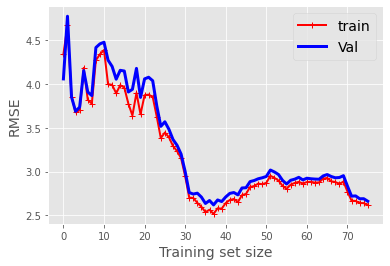

In [164]:
lin_reg = LinearRegression()
plot_learn_curve(lin_reg, x, y)

# Underfitting

We can see from the first instance that the model even it just one instance in training and it can not predict well, then add new instances decrease the error but it still bigger, and as we add a new instance the error not change or change a little bit at the end, as well as the validation error was close to the training error, so we have to underfit the data, and we know that because we trying to run the linear model with non-linear data without any polynomial features.

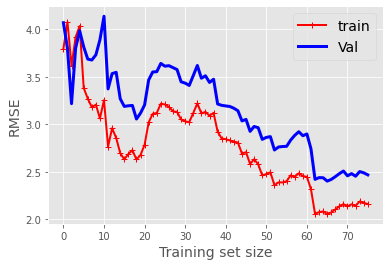

In [180]:
lin_reg = LinearRegression()
poly_features = PolynomialFeatures(degree=9, include_bias=False)
X_poly = poly_features.fit_transform(x)
plot_learn_curve(lin_reg, x, y)

# Overfitting

Even that its not actually appearning of the underfitting and overftting problem, but this gap between training and validation error can define that its overfitting problem and we can add more instances to genrlize the error.